In [1]:
import pandas as pd
table_t2d = pd.read_table('../table/QinT2D_shapely.txt')
Metadata = pd.read_table('../../Qin2012T2D/Qin2012T2D_metadata_matched.txt')
Metadata = Metadata[['Run','Diabetic']]

In [2]:
Metadata = Metadata.replace('Y', 'T2D')
Metadata = Metadata.replace('N', 'Healthy')

In [3]:
Metadata = Metadata.rename(columns={"Run":"id","Diabetic":"Status"})

In [4]:
Metadata

,id,Status
0,SRR341581,T2D
1,SRR341582,T2D
2,SRR341583,T2D
3,SRR341584,T2D
4,SRR341585,T2D
...,...,...
147,SRR1778452,T2D
148,SRR1778453,T2D
149,SRR1778454,T2D
150,SRR1778455,T2D


In [5]:
df = table_t2d
df = df.loc[:, (df != 0).any(axis=0)]

In [6]:
df['sum'] = df.sum(axis=1)

/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_85690/39549284.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['sum'] = df.sum(axis=1)
/var/folders/0g/jffzlx7x0v37frp3q4ssdnp80000gn/T/ipykernel_85690/39549284.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sum'] = df.sum(axis=1)


In [7]:
df.merge(Metadata, how = 'left',on = 'id').to_csv('../table/QinT2D_shapely_new.txt', sep = '\t')

In [13]:
df.merge(Metadata, how = 'left',on = 'id')

,id,CAG-81 sp900066055,CAG-269 sp900554175,CAG-269 sp001916065,HGM05232 sp900759955,Massilicoli timonensis,Bilophila sp902373525,Collinsella sp900551665,Anaerostipes sp900756035,Faecalibacillus faecis,...,Blautia sp900539145,Blautia stercoris,Blautia_A hydrogenotrophica,CAG-110 sp900763965,CAG-177 sp000431775,Butyricimonas sp900184685,CABMKH01 sp902386935,Agathobacter rectalis,sum,Status
0,SRR341669,-0.000941,0.054575,-0.000216,-0.014560,0.000011,0.011115,-0.002345,-0.062459,-0.000102,...,-0.000665,0.041900,-0.033082,0.012809,0.025959,-0.000130,0.002421,-0.023300,0.271331,T2D
1,SRR341696,-0.000392,0.015705,-0.000216,0.000910,0.000011,0.011115,-0.002345,-0.063854,-0.000372,...,-0.022011,0.041906,-0.041542,0.007714,-0.004326,-0.000091,0.002433,-0.054772,0.487677,Healthy
2,SRR341634,-0.000440,0.024682,-0.000216,0.001448,0.000009,0.011115,-0.002345,0.074886,-0.000372,...,-0.015595,0.041900,0.003368,0.012293,0.025959,-0.000130,0.007214,-0.023300,0.168081,Healthy
3,SRR341695,-0.000417,0.022838,-0.000058,0.002034,-0.000106,0.005656,-0.002345,-0.042319,-0.000102,...,-0.021991,0.083949,-0.147596,0.015641,0.011952,-0.000091,0.002457,-0.052274,0.437838,Healthy
4,SRR341612,-0.000712,0.024621,-0.000216,-0.023168,0.000011,0.011115,-0.002345,-0.093296,-0.000372,...,-0.021991,0.041900,0.002682,0.009503,-0.004326,-0.000130,0.000996,-0.023150,0.714088,T2D
5,SRR341653,-0.000320,0.022782,-0.000244,0.001448,0.000024,0.011115,-0.001699,-0.033502,-0.000102,...,-0.019301,0.042546,0.003368,-0.000954,-0.004326,-0.000130,0.002457,-0.036973,0.809679,Healthy
6,SRR341604,-0.000720,0.055202,-0.000326,-0.014560,-0.000170,0.011115,-0.001699,-0.038347,-0.000102,...,-0.019396,0.040849,-0.033082,-0.000677,-0.016404,-0.000130,0.007240,-0.036412,0.801536,T2D
7,SRR341622,-0.000363,0.024621,-0.000216,0.001448,-0.000262,0.011115,-0.002345,-0.063192,-0.000372,...,0.002112,0.040849,0.003368,0.012293,-0.004326,-0.000130,0.002433,-0.023300,0.526901,Healthy
8,SRR341656,-0.000331,0.047105,-0.000216,0.000910,0.000011,0.011115,-0.002345,-0.061481,-0.000102,...,-0.021991,0.041900,-0.041542,0.012809,-0.004326,-0.000130,0.007215,-0.023300,-0.226111,T2D
9,SRR341666,-0.000356,0.047220,0.000059,0.000910,0.000008,0.011115,-0.002345,0.069956,-0.000102,...,-0.015528,0.041900,-0.041542,0.018251,0.025959,-0.000130,0.000729,-0.036973,0.431817,T2D


In [14]:
df = df.merge(Metadata, how = 'left',on = 'id').groupby(['Status']).mean()

In [69]:
df.T.sort_values(by=['Healthy'])

Status,Healthy,T2D
Bacteroides pyogenes,-0.197742,-0.130667
UMGS1908 sp900556185,-0.067350,-0.078209
Bacteroides massiliensis_A,-0.064331,-0.059154
Actinomyces sp000220835,-0.061590,-0.053624
UMGS946 sp900547135,-0.052546,-0.052577
...,...,...
Bifidobacterium pullorum,0.073142,0.043179
Acinetobacter sp900771065,0.083385,0.087084
Anaerococcus senegalensis,0.094170,0.093787
Bacteroides salyersiae,0.136117,0.135449


In [70]:
df.T.sort_values(by=['T2D'])

Status,Healthy,T2D
Bacteroides pyogenes,-0.197742,-0.130667
UMGS1908 sp900556185,-0.067350,-0.078209
Bacteroides massiliensis_A,-0.064331,-0.059154
Blautia_A schinkii,-0.037310,-0.057279
Actinomyces sp000220835,-0.061590,-0.053624
...,...,...
CAG-485 sp900321585,0.052520,0.067386
Acinetobacter sp900771065,0.083385,0.087084
Anaerococcus senegalensis,0.094170,0.093787
Bacteroides salyersiae,0.136117,0.135449


<AxesSubplot:>

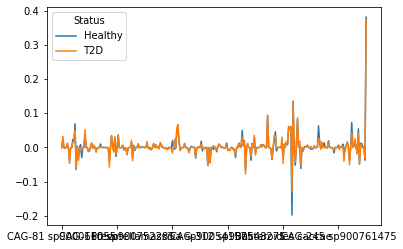

In [25]:
df.T.plot()

In [44]:
dfT = df.T

In [45]:
dfT

Status,Healthy,T2D
CAG-81 sp900066055,-0.000355,-0.000481
CAG-269 sp900554175,0.022027,0.032814
CAG-269 sp001916065,-0.000293,-0.000171
HGM05232 sp900759955,-0.001639,-0.002567
Massilicoli timonensis,-0.000059,-0.000071
...,...,...
CAG-177 sp000431775,0.011847,0.001497
Butyricimonas sp900184685,-0.000138,-0.000109
CABMKH01 sp902386935,0.002695,0.002849
Agathobacter rectalis,-0.037101,-0.033511


In [46]:
dfT['n'] = dfT.index

In [51]:
dfT.insert(0, 'New_ID', range(1, 1 + len(dfT)))

In [56]:
dfT

Status,New_ID,Healthy,T2D,species
CAG-81 sp900066055,1,-0.000355,-0.000481,CAG-81 sp900066055
CAG-269 sp900554175,2,0.022027,0.032814,CAG-269 sp900554175
CAG-269 sp001916065,3,-0.000293,-0.000171,CAG-269 sp001916065
HGM05232 sp900759955,4,-0.001639,-0.002567,HGM05232 sp900759955
Massilicoli timonensis,5,-0.000059,-0.000071,Massilicoli timonensis
...,...,...,...,...
CAG-177 sp000431775,272,0.011847,0.001497,CAG-177 sp000431775
Butyricimonas sp900184685,273,-0.000138,-0.000109,Butyricimonas sp900184685
CABMKH01 sp902386935,274,0.002695,0.002849,CABMKH01 sp902386935
Agathobacter rectalis,275,-0.037101,-0.033511,Agathobacter rectalis


<AxesSubplot:xlabel='Healthy', ylabel='New_ID'>

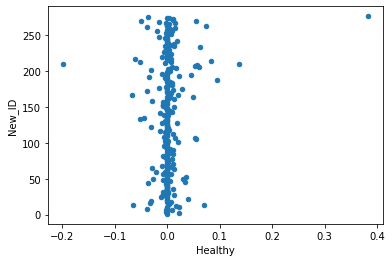

In [65]:
dfT.plot.scatter(x = 'Healthy', y = 'New_ID')

<AxesSubplot:xlabel='T2D', ylabel='New_ID'>

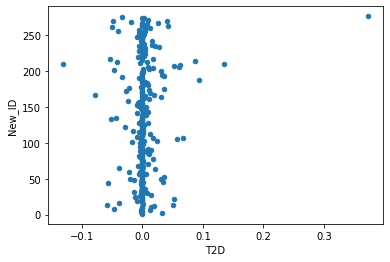

In [66]:
dfT.plot.scatter(x = 'T2D', y = 'New_ID')